In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable

In [2]:
if torch.cuda.is_available():
   DEVICE = torch.device("cuda")
else:
   DEVICE = torch.device("cpu")

print(DEVICE)

cpu


In [3]:
torch.manual_seed(1)

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor(),]),download=True,)


test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.Compose([transforms.ToTensor(),]))

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


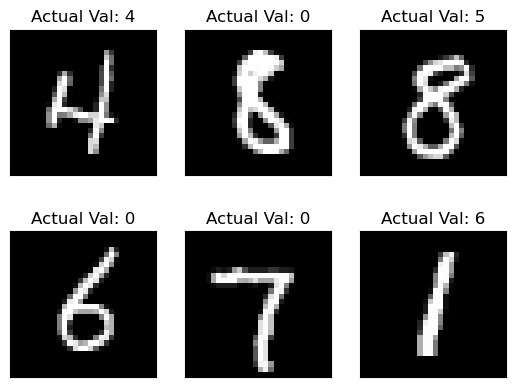

In [5]:
randomLabels = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = randomLabels


MNIST_train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=100,shuffle=True)

MNIST_test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=100,shuffle=False)

samples = iter(MNIST_train_loader)
sample_data, sample_targets = next(samples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(sample_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):


        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, optimizer, epoch, MNIST_train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0
    for i, (data, target) in enumerate(MNIST_train_loader):
        
         
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()


        prediction = model(data)
        loss = loss_fn(prediction, target)
        

        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(MNIST_train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)

In [ ]:
def test(model, epoch, MNIST_test_loader):
    test_load = MNIST_test_loader
    model.eval()
    n_correct = 0
    n_samples = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
           
            _,predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            count += 1
            n_correct += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss



rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

train_loss_arr = []

test_loss_arr = []

epochArr = []
epochs = 1000
interval = 500
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = train(rmnist, optimizer, epoch, MNIST_train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = test(rmnist, epoch, MNIST_test_loader)
    test_loss_arr.append(testloss)

    


plt.plot(epochArr,train_loss_arr,color="red")
plt.plot(epochArr,test_loss_arr,color="Blue")
plt.legend(['Train Loss','Test Loss'],loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Random labels train vs test loss",color = "green")

plt.show()

Total no of parameters in Model 1: 397510
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.3073
Train Log:Epoch: 1, Step [501/60000], TrainLoss: 2.3045
Accuracy of the network on the test images: 12.42% & Test Loss: 2.3023187589645384
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.3007
Train Log:Epoch: 2, Step [501/60000], TrainLoss: 2.2990
Accuracy of the network on the test images: 13.3% & Test Loss: 2.29012020111084
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.3070
Train Log:Epoch: 3, Step [501/60000], TrainLoss: 2.3126
Accuracy of the network on the test images: 12.69% & Test Loss: 2.3024425172805785
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.2940
Train Log:Epoch: 4, Step [501/60000], TrainLoss: 2.2815
Accuracy of the network on the test images: 11.95% & Test Loss: 2.3079366993904116
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.2894
Train Log:Epoch: 5, Step [501/60000], TrainLoss: 2.3042
Accuracy of the network on the test images: 9.48% & Test Loss: 2.30686464548110